In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [37]:
df_train = pd.read_csv('data\df_train.csv')

In [3]:
df_train.columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', '5YearRange',
       '10YearRange'],
      dtype='object')

In [38]:
features = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [39]:
subset = df_train[features]

In [6]:
subset

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.460993,0.547945,0.344086,0.284091,0.783505,0.0,0.340426,0.112903
1,0.531915,0.561644,0.150538,0.318182,0.742268,0.0,0.095745,0.080645
2,0.780142,0.383562,0.967742,0.284091,0.752577,0.0,0.074468,0.048387
3,0.460993,0.986301,0.849462,0.545455,0.556701,0.0,0.074468,0.370968
4,0.390071,0.452055,0.172043,0.386364,0.917526,0.0,0.095745,0.032258
...,...,...,...,...,...,...,...,...
748,0.361702,0.780822,0.946237,0.806818,0.041237,0.0,0.074468,0.016129
749,0.219858,0.671233,0.387097,0.431818,0.731959,0.0,0.106383,0.032258
750,0.531915,0.287671,0.397849,0.943182,0.000000,0.0,0.436170,0.080645
751,0.425532,0.835616,0.709677,0.681818,0.010309,0.0,0.021277,0.048387


**Dla KMeans szukamy najlepszej liczby klastrów za pomocą różnych metryk**

In [87]:
sse = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(subset)
    sse.append(kmeans.inertia_)

    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(subset, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calinski-Harabasz Index
    calinski_harabasz_avg = calinski_harabasz_score(subset, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    
    # Davies-Bouldin Index
    davies_bouldin_avg = davies_bouldin_score(subset, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)



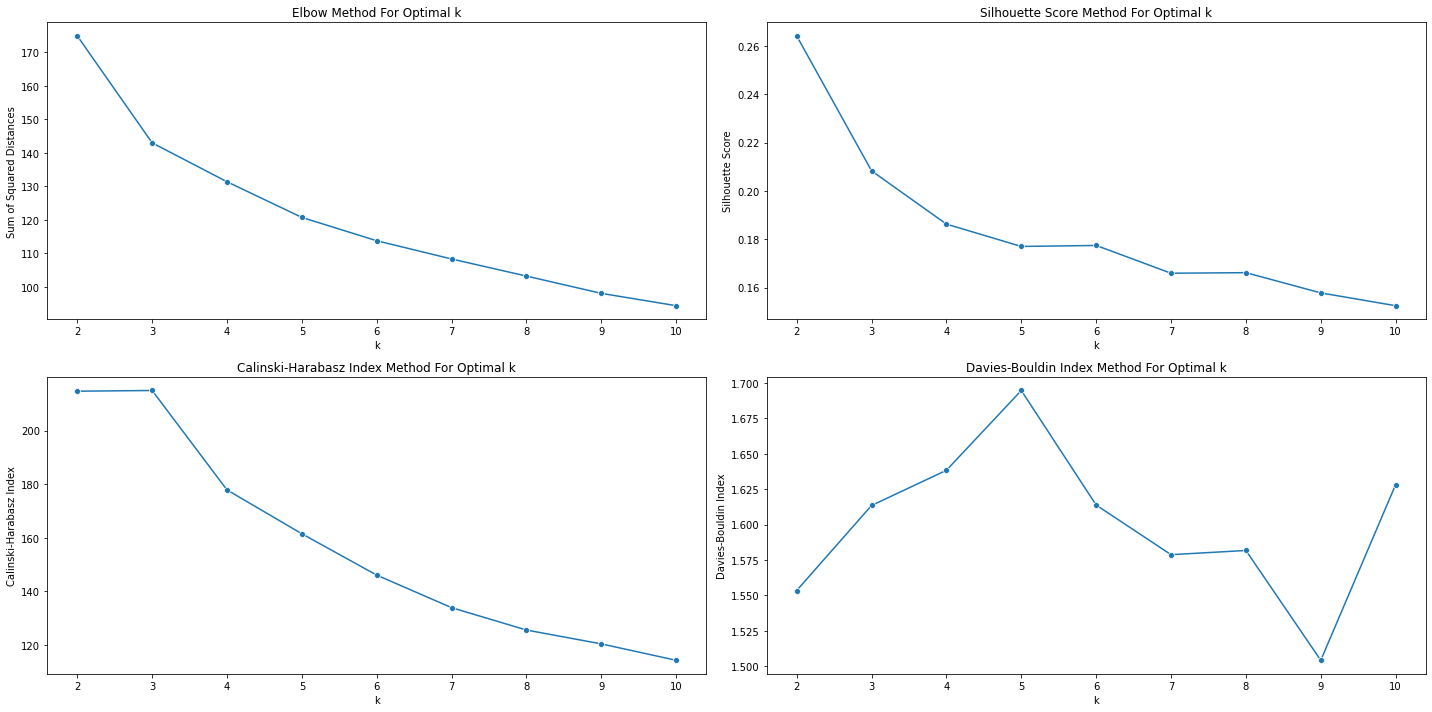

In [89]:
plt.figure(figsize=(20, 10))

# Elbow Method
plt.subplot(2, 2, 1)
sns.lineplot(x=possible_k_values, y=sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')

# Silhouette Score
plt.subplot(2, 2, 2)
sns.lineplot(x=possible_k_values, y=silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(2, 2, 3)
sns.lineplot(x=possible_k_values, y=calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Index')

# Davies-Bouldin Index
plt.subplot(2, 2, 4)
sns.lineplot(x=possible_k_values, y=davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

- **Metoda łokcia**: 3 klastry
- **Silhouette Score**: 2 klastry
- **Calinski-Harabasz**: 3 klastry
- **Davies-Bouldin**: 2 lub 9 klastrów


**Inne sposoby klasteryzacji**

In [82]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=10)
y_dbscan = dbscan.fit_predict(subset)

In [83]:
silhouette_avg = silhouette_score(subset, y_dbscan)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.38323823967326764


In [84]:
# funkcja do zliczania obserwacji w poszczególnych klastrach
def print_number_of_clusters(array):
    
    unique_values, counts = np.unique(array, return_counts=True)

    for value, count in zip(unique_values, counts):
        print(f'Value: {value}, Count: {count}')

In [85]:
print_number_of_clusters(y_dbscan)

Value: -1, Count: 2
Value: 0, Count: 751


Widać że dbscan trochę słabo działa bo prawie wszystko jest w jednym klastrze

In [69]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = gmm.fit_predict(subset)
print_number_of_clusters(y_gmm)

Value: 0, Count: 36
Value: 1, Count: 685
Value: 2, Count: 32


In [28]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
y_mean_shift = mean_shift.fit_predict(subset)
print_number_of_clusters(y_mean_shift)

Value: 0, Count: 742
Value: 1, Count: 11


In [62]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(subset)
print_number_of_clusters(y_spectral)

Value: 0, Count: 314
Value: 1, Count: 334
Value: 2, Count: 105


Spectral Clustering ma jakiś potencjał więc poszukamy najlepszej ilości klastrów.

In [51]:

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
   spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
   cluster_labels = spectral.fit_predict(subset)
    
   
    # Silhouette Score
   silhouette_avg = silhouette_score(subset, cluster_labels)
   silhouette_scores.append(silhouette_avg)
    
    # Calinski-Harabasz Index
   calinski_harabasz_avg = calinski_harabasz_score(subset, cluster_labels)
   calinski_harabasz_scores.append(calinski_harabasz_avg)
    
    # Davies-Bouldin Index
   davies_bouldin_avg = davies_bouldin_score(subset, cluster_labels)
   davies_bouldin_scores.append(davies_bouldin_avg)
    
   


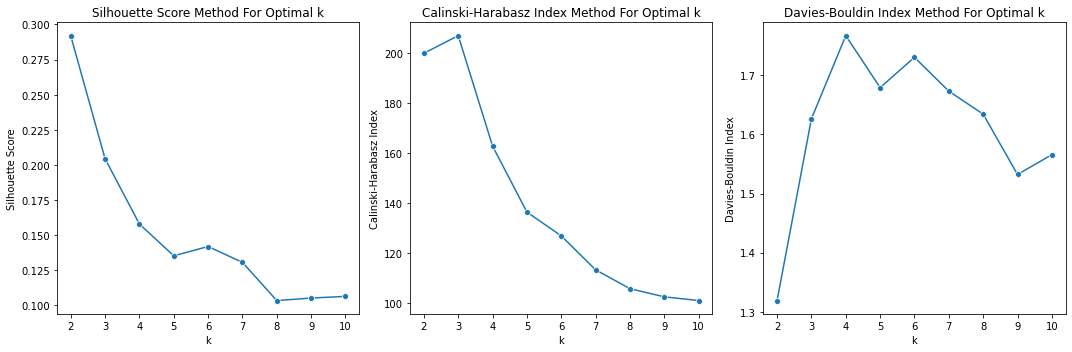

In [53]:
plt.figure(figsize=(15, 5))
# Silhouette Score
plt.subplot(1, 3, 1)
sns.lineplot(x=possible_k_values, y=silhouette_scores, marker='o')
plt.title('Silhouette Score Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
sns.lineplot(x=possible_k_values, y=calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Index')

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
sns.lineplot(x=possible_k_values, y=davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

- **Silhouette Score**: 2 klastry
- **Calinski-Harabasz**: 3 klastry
- **Davies-Bouldin**: 2 klastry


Żeby zobaczyć jak wyglądają klastry użyjemy PCA w celu zmniejszeniu wymiarów z 8 do 2

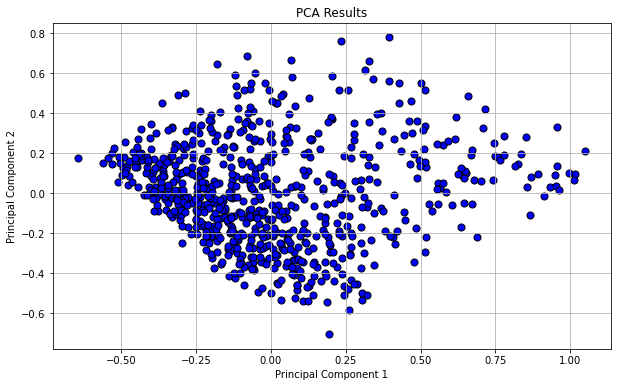

Explained variance ratio: [0.3376464  0.21754411]


In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(subset)


plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance)


In [67]:
spectral2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
cluster_labels2 = spectral2.fit_predict(subset)

spectral3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
cluster_labels3 = spectral3.fit_predict(subset)

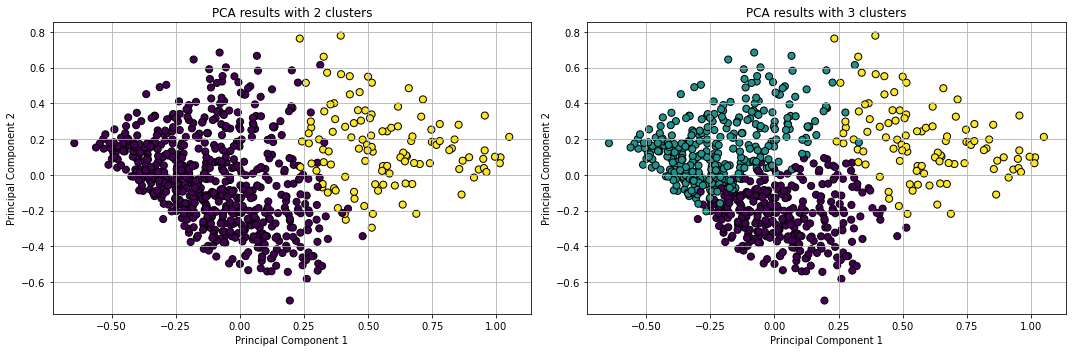

In [68]:
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(subset)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels2, edgecolor='k', s=50)
plt.title('PCA results with 2 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels3, edgecolor='k', s=50)
plt.title('PCA results with 3 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()
